In [24]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client 

In [25]:
# Download seismic data 
network = 'IU'
station = 'TATO'
channel = 'BH*'
starttime = UTCDateTime('2024-04-22T23:58:11')
endtime = starttime + 60*15 # 15 mins 


In [26]:
# Client 
client = Client('IRIS')
st = client.get_waveforms(network = network, station = station, location = '00', channel = channel, starttime = starttime, endtime = endtime, attach_response = True)
from obspy.clients.fdsn import Client



In [27]:
# Convert to velocity 
st.remove_response(output = 'VEL')


3 Trace(s) in Stream:
IU.TATO.00.BH1 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BH2 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BHZ | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples

In [28]:
# Pre-processing 
st.merge(fill_value = 'interpolate') # Merge traces if we have gaps 
st.detrend(type = 'linear') # Remove linear trends 
st.taper(max_percentage=0.05) # Apply taper 


3 Trace(s) in Stream:
IU.TATO.00.BH1 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BH2 | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples
IU.TATO.00.BHZ | 2024-04-22T23:58:11.019538Z - 2024-04-23T00:13:10.969538Z | 20.0 Hz, 18000 samples

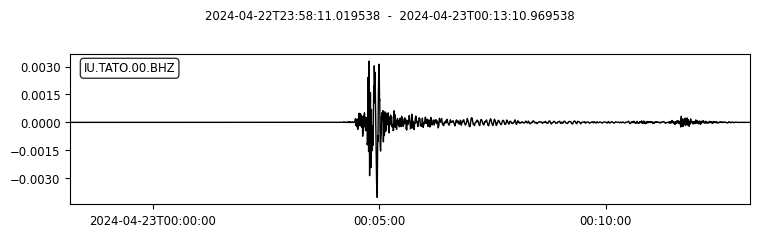

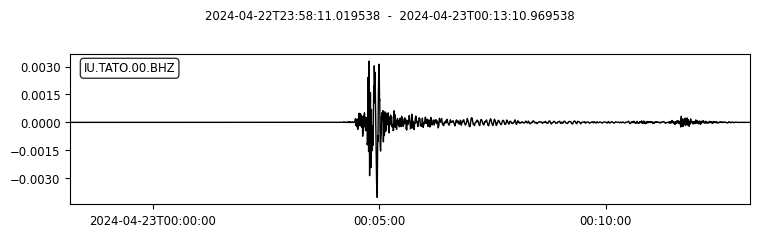

In [29]:
# Plot spectogram 
st[2].plot()